In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('L0001.csv')

# Assuming your dataset has columns 'x', 'y', 'z', and 'target'
X = df[['x', 'y']]  # Features (x, y)
y = df['MPArea']      # Target values

df.head()

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750,0.009,0.0,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760,0.009,0.0,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770,0.009,0.0,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780,0.009,0.0,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790,0.009,0.0,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111


In [3]:
# Define the number of clusters (you can adjust this based on your dataset)
num_clusters = 4 #number of clusters
kmeans = KMeans(n_clusters = num_clusters, random_state=42) 
kmeans.fit(X) #fitting the data


KMeans(n_clusters=4, random_state=42)

In [4]:
centroids = kmeans.cluster_centers_ #calculating centroids
predicted_clusters = kmeans.labels_ #cluster colors and seperations

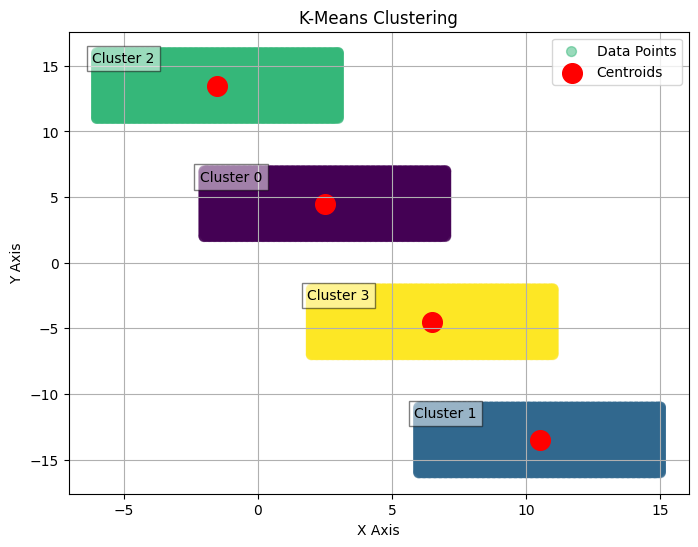

In [5]:
# Scatter plot of the data points with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['x'], X['y'], c=predicted_clusters, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)

plt.text(-5, 15, 'Cluster 2', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.text(-1, 6, 'Cluster 0', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.text(3, -3, 'Cluster 3', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.text(7, -12, 'Cluster 1', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.show()



df['Cluster'] = predicted_clusters


In [9]:
# Example point to predict
new_point = np.array([[5, -5]])

# Predict which cluster the new point belongs to
cluster = kmeans.predict(new_point)

print("Cluster:", cluster[0])


Cluster: 3


C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
